In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('wikidata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5000 non-null   int64 
 1   Category    5000 non-null   object
 2   Page Text   5000 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [3]:
df = df.iloc[: , 1:]

In [4]:

df.rename(columns = {'Page Text':'text'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5000 non-null   object
 1   text      5000 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB


In [5]:
df['Category'].value_counts()

Arts           500
Geography      500
Health         500
History        500
Biology        500
Politics       500
Transport      500
Mathematics    500
Technology     500
Sports         500
Name: Category, dtype: int64

In [6]:
train_X= df

In [7]:
train_X['text'] = train_X['text'].str.lower()
train_X.head()

,Category,text
0,Mathematics,mathematics (from ancient greek μάθημα (máthē...
1,Mathematics,"in mathematics, a function from a set x to a s..."
2,Mathematics,the history of mathematics deals with the orig...
3,Mathematics,"in mathematics, a matrix (plural matrices) is ..."
4,Mathematics,applied mathematics is the application of math...


In [8]:
from nltk.corpus import stopwords
stopword = set(stopwords.words('english'))
print("; ".join(stopwords.words('english')))

i; me; my; myself; we; our; ours; ourselves; you; you're; you've; you'll; you'd; your; yours; yourself; yourselves; he; him; his; himself; she; she's; her; hers; herself; it; it's; its; itself; they; them; their; theirs; themselves; what; which; who; whom; this; that; that'll; these; those; am; is; are; was; were; be; been; being; have; has; had; having; do; does; did; doing; a; an; the; and; but; if; or; because; as; until; while; of; at; by; for; with; about; against; between; into; through; during; before; after; above; below; to; from; up; down; in; out; on; off; over; under; again; further; then; once; here; there; when; where; why; how; all; any; both; each; few; more; most; other; some; such; no; nor; not; only; own; same; so; than; too; very; s; t; can; will; just; don; don't; should; should've; now; d; ll; m; o; re; ve; y; ain; aren; aren't; couldn; couldn't; didn; didn't; doesn; doesn't; hadn; hadn't; hasn; hasn't; haven; haven't; isn; isn't; ma; mightn; mightn't; mustn; must

In [9]:
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopword])

train_X['text11'] = train_X['text'].apply(lambda text :remove_stopwords(text))
train_X.head()

,Category,text,text11
0,Mathematics,mathematics (from ancient greek μάθημα (máthē...,mathematics (from ancient greek μάθημα (máthēm...
1,Mathematics,"in mathematics, a function from a set x to a s...","mathematics, function set x set assigns elemen..."
2,Mathematics,the history of mathematics deals with the orig...,history mathematics deals origin discoveries m...
3,Mathematics,"in mathematics, a matrix (plural matrices) is ...","mathematics, matrix (plural matrices) rectangu..."
4,Mathematics,applied mathematics is the application of math...,applied mathematics application mathematical m...


In [10]:
import numpy as np 
import pandas as pd 
import re
import nltk
import string
punc_to_remove = string.punctuation
print(punc_to_remove)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [11]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

train_X["text12"] = train_X["text11"].apply(lambda text: remove_urls(text))
train_X.head()

,Category,text,text11,text12
0,Mathematics,mathematics (from ancient greek μάθημα (máthē...,mathematics (from ancient greek μάθημα (máthēm...,mathematics (from ancient greek μάθημα (máthēm...
1,Mathematics,"in mathematics, a function from a set x to a s...","mathematics, function set x set assigns elemen...","mathematics, function set x set assigns elemen..."
2,Mathematics,the history of mathematics deals with the orig...,history mathematics deals origin discoveries m...,history mathematics deals origin discoveries m...
3,Mathematics,"in mathematics, a matrix (plural matrices) is ...","mathematics, matrix (plural matrices) rectangu...","mathematics, matrix (plural matrices) rectangu..."
4,Mathematics,applied mathematics is the application of math...,applied mathematics application mathematical m...,applied mathematics application mathematical m...


In [12]:
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', punc_to_remove))

train_X['text13'] = train_X['text12'].apply(lambda text: remove_punctuation(text))
train_X.head()

,Category,text,text11,text12,text13
0,Mathematics,mathematics (from ancient greek μάθημα (máthē...,mathematics (from ancient greek μάθημα (máthēm...,mathematics (from ancient greek μάθημα (máthēm...,mathematics from ancient greek μάθημα máthēma ...
1,Mathematics,"in mathematics, a function from a set x to a s...","mathematics, function set x set assigns elemen...","mathematics, function set x set assigns elemen...",mathematics function set x set assigns element...
2,Mathematics,the history of mathematics deals with the orig...,history mathematics deals origin discoveries m...,history mathematics deals origin discoveries m...,history mathematics deals origin discoveries m...
3,Mathematics,"in mathematics, a matrix (plural matrices) is ...","mathematics, matrix (plural matrices) rectangu...","mathematics, matrix (plural matrices) rectangu...",mathematics matrix plural matrices rectangular...
4,Mathematics,applied mathematics is the application of math...,applied mathematics application mathematical m...,applied mathematics application mathematical m...,applied mathematics application mathematical m...


In [13]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

train_X["textstemmed"] = train_X["text13"].apply(lambda text: stem_words(text))
train_X.head()

,Category,text,text11,text12,text13,textstemmed
0,Mathematics,mathematics (from ancient greek μάθημα (máthē...,mathematics (from ancient greek μάθημα (máthēm...,mathematics (from ancient greek μάθημα (máthēm...,mathematics from ancient greek μάθημα máthēma ...,mathemat from ancient greek μάθημα máthēma kno...
1,Mathematics,"in mathematics, a function from a set x to a s...","mathematics, function set x set assigns elemen...","mathematics, function set x set assigns elemen...",mathematics function set x set assigns element...,mathemat function set x set assign element x e...
2,Mathematics,the history of mathematics deals with the orig...,history mathematics deals origin discoveries m...,history mathematics deals origin discoveries m...,history mathematics deals origin discoveries m...,histori mathemat deal origin discoveri mathema...
3,Mathematics,"in mathematics, a matrix (plural matrices) is ...","mathematics, matrix (plural matrices) rectangu...","mathematics, matrix (plural matrices) rectangu...",mathematics matrix plural matrices rectangular...,mathemat matrix plural matric rectangular arra...
4,Mathematics,applied mathematics is the application of math...,applied mathematics application mathematical m...,applied mathematics application mathematical m...,applied mathematics application mathematical m...,appli mathemat applic mathemat method differ f...


In [14]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

train_X["text_lemmatized"] = train_X["textstemmed"].apply(lambda text: lemmatize_words(text))
train_X.head()

,Category,text,text11,text12,text13,textstemmed,text_lemmatized
0,Mathematics,mathematics (from ancient greek μάθημα (máthē...,mathematics (from ancient greek μάθημα (máthēm...,mathematics (from ancient greek μάθημα (máthēm...,mathematics from ancient greek μάθημα máthēma ...,mathemat from ancient greek μάθημα máthēma kno...,mathemat from ancient greek μάθημα máthēma kno...
1,Mathematics,"in mathematics, a function from a set x to a s...","mathematics, function set x set assigns elemen...","mathematics, function set x set assigns elemen...",mathematics function set x set assigns element...,mathemat function set x set assign element x e...,mathemat function set x set assign element x e...
2,Mathematics,the history of mathematics deals with the orig...,history mathematics deals origin discoveries m...,history mathematics deals origin discoveries m...,history mathematics deals origin discoveries m...,histori mathemat deal origin discoveri mathema...,histori mathemat deal origin discoveri mathema...
3,Mathematics,"in mathematics, a matrix (plural matrices) is ...","mathematics, matrix (plural matrices) rectangu...","mathematics, matrix (plural matrices) rectangu...",mathematics matrix plural matrices rectangular...,mathemat matrix plural matric rectangular arra...,mathemat matrix plural matric rectangular arra...
4,Mathematics,applied mathematics is the application of math...,applied mathematics application mathematical m...,applied mathematics application mathematical m...,applied mathematics application mathematical m...,appli mathemat applic mathemat method differ f...,appli mathemat applic mathemat method differ f...


In [15]:
train_X.drop(['text', 'text11', 'text12', 'text13','textstemmed'], axis=1, inplace=True)

In [16]:
df=train_X
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Category         5000 non-null   object
 1   text_lemmatized  5000 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB


In [17]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each 
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['text_lemmatized'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 296515 unique tokens.


In [19]:
X = tokenizer.texts_to_sequences(df['text_lemmatized'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (5000, 250)


In [20]:
Y = pd.get_dummies(df['Category']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (5000, 10)


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4500, 250) (4500, 10)
(500, 250) (500, 10)


In [22]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from keras.callbacks import ModelCheckpoint, EarlyStopping
model = Sequential()
MAX_NB_WORDS = 50000
# Max number of words in each 
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/5
64/64 [==============================] - 58s 788ms/step - loss: 2.0994 - accuracy: 0.2010 - val_loss: 1.9428 - val_accuracy: 0.2400
Epoch 2/5
64/64 [==============================] - 49s 772ms/step - loss: 1.6957 - accuracy: 0.4010 - val_loss: 1.5679 - val_accuracy: 0.4200
Epoch 3/5
64/64 [==============================] - 50s 778ms/step - loss: 1.2095 - accuracy: 0.5936 - val_loss: 1.2986 - val_accuracy: 0.5889
Epoch 4/5
64/64 [==============================] - 51s 791ms/step - loss: 0.8099 - accuracy: 0.7585 - val_loss: 1.1740 - val_accuracy: 0.6556
Epoch 5/5
64/64 [==============================] - 50s 785ms/step - loss: 0.4732 - accuracy: 0.8657 - val_loss: 1.1638 - val_accuracy: 0.6622


In [23]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

16/16 [==============================] - 1s 61ms/step - loss: 0.9471 - accuracy: 0.7200
Test set
  Loss: 0.947
  Accuracy: 0.720


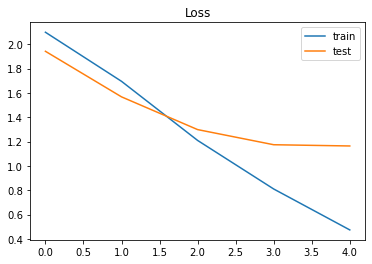

In [24]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

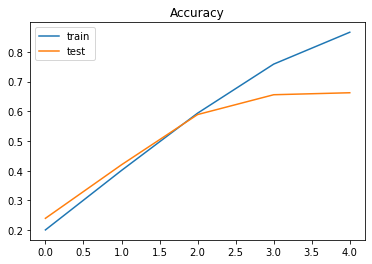

In [25]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [26]:
# Building the CNN Model
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
model = Sequential()      # initilaizing the Sequential nature for CNN model
# Adding the embedding layer which will take in maximum of 250 words as input and provide a 32 dimensional output of those words which belong in the top_words dictionary
model.add(Embedding(50000, 32, input_length=250))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 32)           1600000   
                                                                 
 conv1d (Conv1D)             (None, 250, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 125, 32)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4000)              0         
                                                                 
 dense_1 (Dense)             (None, 250)               1000250   
                                                                 
 dense_2 (Dense)             (None, 10)                2510      
                                                      

In [28]:
# Fitting the data onto model
history = model.fit(X_train, Y_train, epochs=5, batch_size=batch_size,validation_split=0.1)


Epoch 1/5
64/64 [==============================] - 6s 64ms/step - loss: 0.3467 - accuracy: 0.1452 - val_loss: 0.3131 - val_accuracy: 0.2333
Epoch 2/5
64/64 [==============================] - 4s 60ms/step - loss: 0.2310 - accuracy: 0.5872 - val_loss: 0.1655 - val_accuracy: 0.6978
Epoch 3/5
64/64 [==============================] - 4s 60ms/step - loss: 0.0826 - accuracy: 0.9111 - val_loss: 0.0950 - val_accuracy: 0.8467
Epoch 4/5
64/64 [==============================] - 4s 60ms/step - loss: 0.0245 - accuracy: 0.9800 - val_loss: 0.0980 - val_accuracy: 0.8667
Epoch 5/5
64/64 [==============================] - 4s 60ms/step - loss: 0.0111 - accuracy: 0.9896 - val_loss: 0.1102 - val_accuracy: 0.8756


In [29]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

16/16 [==============================] - 0s 5ms/step - loss: 0.1122 - accuracy: 0.8520
Test set
  Loss: 0.112
  Accuracy: 0.852


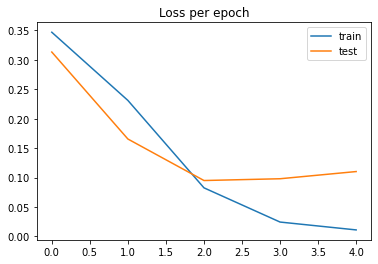

In [30]:
plt.title('Loss per epoch')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

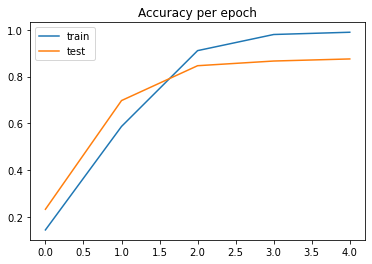

In [31]:
plt.title('Accuracy per epoch')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();